# 💬 **Twitter Sentiment Analysis (Natural Language Processing)**

Authors:
1. Patrick Maina (Team Leader)

2. Christine Ndungu

3. George Nyandusi

4. Teresia Njoki

## **1. 💼 Business Understanding**
### **1.1. Introduction**
Customer sentiment plays a significant role in shaping public perception and guiding product development for tech giants like Apple and Google. By analyzing public opinions through tweets on Twitter, entities can identify trends, gauge satisfaction, and respond to customer needs more effectively. In light of this, this project aims to build a sentiment analysis model that classifies Tweets about Apple and Google products into sentiment categories (positive, negative and neutral sentiments).

### **1.2. Problem Statement**
Apple and Google, two of the world's leading tech companies, heavily depend on public perception to maintain their market positions and customer trust. As consumers increasingly voice their opinions on platforms like Twitter, understanding these sentiments has become very paramount for brand management, product development, and customer engagement strategies. This has therefore led to the need to develop algorithms that can provide sentiments for various opinions from users.

### **1.3. Objectives**
The main objectives of this project are:
- To apply **text preprocessing and vectorization** techniques to prepare the Twitter data for effective model training.

- To develop a **binary sentiment** classifier to distinguish between positive and negative tweets, as a baseline.

- To extend the model to a **multiclass classifier**, that includes the neutral class.

- To evaluate classifier performance using appropriate metrics such as F1-score, precision and recall, particularly for imbalanced classes.
- To provide actionable data-driven insights and recommendations.

## **2. 📊 Data Understanding**
In this step, we will explore the dataset to understand the kind of information it contains, the different features and their data types, as well as checking for things like missing values or unusual patterns. This will help us get a clear picture of the data before moving on to cleaning, preprocessing and vectorization.

The dataset contains the following features:
- `tweet_text`: This is the actual content of the tweet. It is the main text input used for sentiment classification.

- `emotion_in_tweet_is_directed_at`: This specifies the tatget of the emotion expressed in the tweet (e.g., Apple, Google)

- `is_there_an_emotion_directed_at_a_brand_or_product`: This indicates whether the tweet expresses an emotion directed at a brand or product. It serves as the label for classification.

### **2.1. Import Libraries**
For this project, we will implement the following tools and libraries:
- `Numpy`: for numerical computations

- `Pandas`: for data loading, cleaning and manipulation

- `Seaborn`: for data visualization and EDA

- `Matplotlib`: for data visualization and EDA

- `Plotly`: for interactive visualizations

- `Scikit-Learn`: for data preprocessing, predictive modeling and model evaluation

- `Imblearn`: for handling class imbalance

- `NLTK`: the Natural Language Toolkit for Natural Language Processing tasks

- `Re`: The Regex library for text cleaning and manipulation.

In [36]:
# import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from scipy.sparse import hstack, csr_matrix

# visualization libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization style
sns.set(style="whitegrid")

# nltk imports
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/patrick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/patrick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/patrick/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### **2.2. Data Loading and Inspection**
In this section, we will load the dataset, and check the info, as well as the summary statistics.

In [37]:
# load the dataset
tweet_df = pd.read_csv('data/twitter_data.csv', encoding='latin-1')

# display the first few rows of the dataset
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [38]:
# check the dataset info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From the `info()` function, we can note the following:
- The dataset contains a total of `9093` records, and 3 columns/features.

- All the columns are of the `object` data type

In order to understand the columns better, and for ease of readability, we will rename the columns to give the data more meaning.

In [39]:
# rename the columns in the dataset
def rename_columns(df):
    df.columns = ['tweet', 'tweet_directed_at', 'sentiment']
    return df

tweet_df = rename_columns(tweet_df)
tweet_df.head()

,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In the sentiment column, we can check the different classes (sentiments), as well as their respective counts.

In [40]:
# check the unique values in 'sentiment'
tweet_df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

From the above cell, we have four distinct classes namely:
- `Positive emotion`

- `Negative emotion`

- `No emotion toward the brand or product`

- `I can't tell`

The last two classes are not distict classes per se, so we can combine the two classes to create one single class (`Neutral emotion`), making the number of classes 3 in total.

In [41]:
# combine the 'No emotion toward brand or product' and 'No emotion toward brand or product' into a single category
tweet_df['sentiment'] = tweet_df['sentiment'].replace(
    {
        "No emotion toward brand or product": "Neutral emotion",
        "I can't tell": "Neutral emotion",
    }
)

# check the unique values in the sentiment column
print("Unique Sentiments:")
print(tweet_df['sentiment'].unique())

Unique Sentiments:
['Negative emotion' 'Positive emotion' 'Neutral emotion']


Next, we will check for missing values and duplicate values in our dataset.

In [42]:
# check for missing values, and express as a percentage
missing_values = tweet_df.isna().sum() / len(tweet_df) * 100
print("Missing Values (%):")
print(missing_values)
# tweet_df.isna().sum()

Missing Values (%):
tweet                 0.010997
tweet_directed_at    63.807324
sentiment             0.000000
dtype: float64


We have a very huge number of missing values in the `tweet_directed_at` column. Since this column is not very significant in the modeling process, we will drop it entirely.

In [43]:
# fill the missing values in 'tweet_directed_at' column with 'Not directed'
tweet_df['tweet_directed_at'].fillna('Not directed', inplace=True)
# tweet_df.drop(columns=['tweet_directed_at'], inplace=True)

# drop the missing value in 'tweet' column
tweet_df.dropna(subset=['tweet'], inplace=True, axis=0)

# check again for missing values
tweet_df.isna().sum()

tweet                0
tweet_directed_at    0
sentiment            0
dtype: int64

In this section, we check for duplicate rows in the dataset

In [44]:
# check for duplicate values
tweet_df.duplicated().sum()

np.int64(22)

We have 22 duplicate rows in the data. We will drop the duplicate rows entirely.

In [45]:
# drop the duplicate rows
tweet_df.drop_duplicates(inplace=True)
tweet_df.duplicated().sum()

np.int64(0)

Next, we will check the summary statistics of the data.

In [46]:
tweet_df.describe()

,tweet,tweet_directed_at,sentiment
count,9070,9070,9070
unique,9065,10,3
top,RT @mention RT @mention It's not a rumor: Appl...,Not directed,Neutral emotion
freq,2,5788,5531


### **2.3. Exploratory Data Analysis**
In this section, we will perform a systematic investigation of the dataset to extract insights, evaluate feature distributions, assess the relationship between the feature and target variables, and identify anomalies, outliers or data quality issues. This will guide the selection of appropriate modeling techniques.

### **2.3.1. Dataset Overview**
In this section, we get a general overview of the dataset, including the shape, number of tweets, number of features and column info.

In [47]:
# Basic dataset overview
print("Dataset Overview")
print("=" * 50)
print(f"Dataset shape: {tweet_df.shape}")
print(f"Number of tweets: {len(tweet_df)}")
print(f"Number of features: {len(tweet_df.columns)}")
print(f"Memory usage: {tweet_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
print("-" * 30)
for col in tweet_df.columns:
    print(f"• {col}: {tweet_df[col].dtype}")

print("\nDataset Info:")
tweet_df.info()

print("\nFirst few rows:")
tweet_df.head(10)

Dataset Overview
Dataset shape: (9070, 3)
Number of tweets: 9070
Number of features: 3
Memory usage: 2.54 MB

Column Information:
------------------------------
• tweet: object
• tweet_directed_at: object
• sentiment: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet              9070 non-null   object
 1   tweet_directed_at  9070 non-null   object
 2   sentiment          9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB

First few rows:


,tweet,tweet_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Not directed,Neutral emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


### **2.3.2. Sentiment Distribution Analysis**
In this section, we will look at the distribution of the unique values in the `sentiment` column.

In [48]:
# Sentiment Distribution Analysis
print("Sentiment Distribution Analysis")
print("=" * 40)

# Count unique sentiment values
sentiment_counts = tweet_df['sentiment'].value_counts()
print("Sentiment Categories:")
print(sentiment_counts)

# Calculate percentages
sentiment_percentages = tweet_df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_percentages.round(2))

Sentiment Distribution Analysis
Sentiment Categories:
sentiment
Neutral emotion     5531
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment
Neutral emotion     60.98
Positive emotion    32.75
Negative emotion     6.27
Name: proportion, dtype: float64


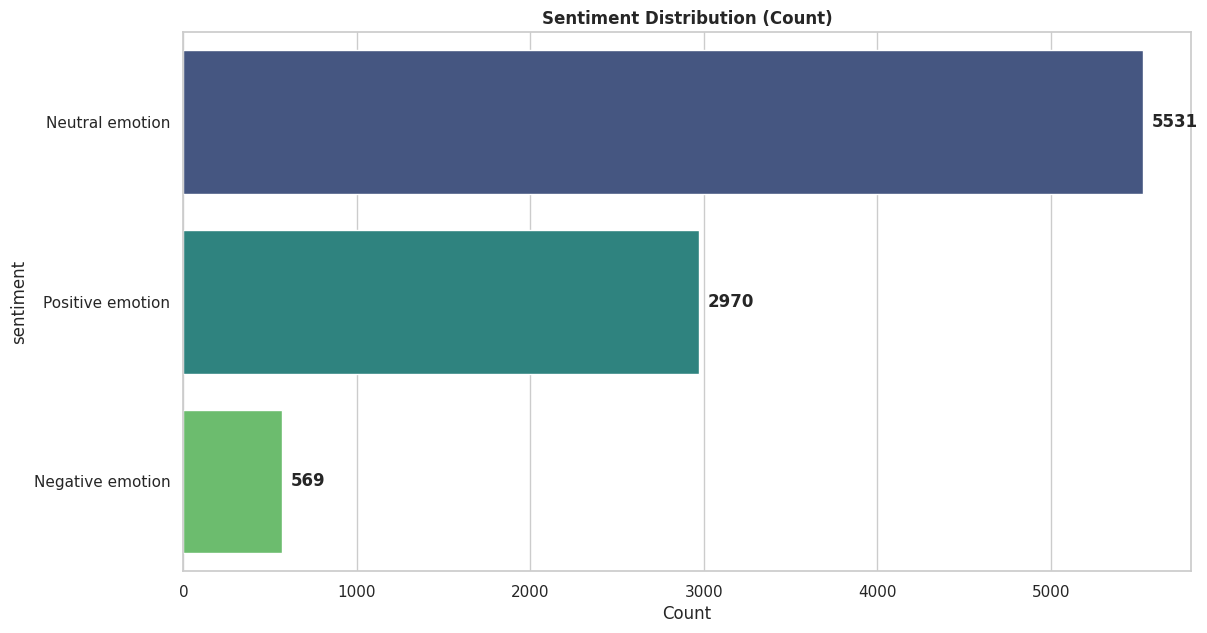

In [49]:
# Visualize sentiment distribution
plt.figure(figsize=(13, 7))

# Plot 1: Count plot
# plt.subplot(2, 3, 1)
ax = sns.countplot(data=tweet_df, y='sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(sentiment_counts.values):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

From the plot, out of the 9070 tweets in the dataset, `5531` tweets express a neutral emotion, which is about `60.98%` of the total tweets, `2970` tweets express a positive emotion, which is about `32.75%` of the total tweets, and `569` tweets express a negative emotion, which is about `6.27%` of the total tweets. This indicates that the sentiment(target) column is **highly imbalanced**. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, the class imbalance will be handles before modeling.

### **2.3.3. Tweet Destination distribution**
In this section, we will look at the distribution of the various entities in which these tweets are directed to. This will aid in knowing how the tweets are distributed across different brands and products, helping us understand:

- **Brand focus and market share** - Which entities (Apple, Google, iPhone, etc.) receive the most social media attention

- **Sentiment patterns by destination** - How different brands/products are perceived by users

- **Data balance assessment** - Whether we have sufficient data for meaningful analysis across different entities

- **Competitive insights** - Relative discussion volume between Apple and Google products

- **Targeted analysis opportunities** - Identifying which brands/products warrant deeper sentiment investigation

This analysis will guide our modeling approach and help generate actionable business insights for brand management and product development strategies.

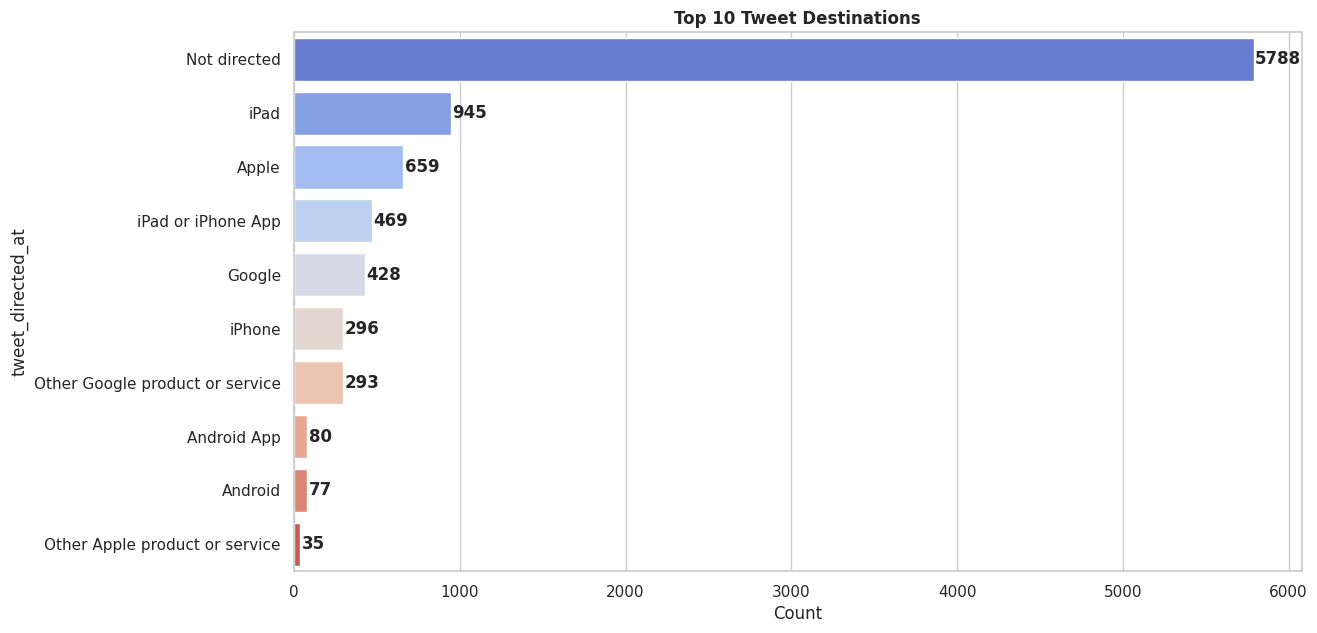

In [50]:
# Plot 2: Tweet destination distribution
plt.figure(figsize=(13, 7))
tweet_dest_counts = tweet_df['tweet_directed_at'].value_counts().head(10)
ax = sns.barplot(x=tweet_dest_counts.values, y=tweet_dest_counts.index, palette='coolwarm')
plt.title('Top 10 Tweet Destinations', fontsize=12, fontweight='bold')
plt.xlabel('Count')
for i, v in enumerate(tweet_dest_counts.values):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')

From the plot above, we observe that the majority of tweets are not directed at any specific brand or product, with "Not directed" being the most frequent category. Among the directed tweets, "iPad," "Apple," and "iPad or iPhone App" receive the highest number of mentions, followed by "Google" and "iPhone." This indicates that Apple-related products and services dominate the conversation in the dataset, while Google and its products receive comparatively fewer mentions. Overall, the data shows a strong focus on Apple within the top tweet destinations.

### **2.3.4. Sentiment by Tweet destination**
The sentiment by tweet destination plot helps us understand how people feel about different brands or products. It shows the proportion of positive, negative, and neutral tweets for each major destination (like Apple, Google, iPhone, etc.). This allows us to:

- Compare public perception of different brands/products.

- Identify which brands/products receive more positive or negative feedback.

- Spot areas where a brand or product may need improvement or is performing well.

- Guide business and marketing strategies based on how sentiment varies across destinations.

In [51]:
# Plot 4: Sentiment by tweet destination using Plotly

# Prepare data
top_destinations = tweet_df['tweet_directed_at'].value_counts().head(5).index
filtered_df = tweet_df[tweet_df['tweet_directed_at'].isin(top_destinations)]
sentiment_dest = pd.crosstab(filtered_df['tweet_directed_at'], filtered_df['sentiment'])

# Create stacked bar chart
fig = go.Figure()

for sentiment in sentiment_dest.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest.index,
        y=sentiment_dest[sentiment],
        name=sentiment,
        text=sentiment_dest[sentiment],
        textposition='auto'
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment by Top 5 Destinations',
    xaxis_title='Tweet Destination',
    yaxis_title='Count',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

In [52]:
# Plot 5: Sentiment proportions by destination

# Create interactive stacked bar chart with custom colors

# Create percentage data from the crosstab
sentiment_dest_pct = sentiment_dest.div(sentiment_dest.sum(axis=1), axis=0) * 100

# Define custom colors for each sentiment
sentiment_colors = {
    'Positive emotion': '#2ecc71',   # green
    'Negative emotion': '#e74c3c',   # red
    'Neutral emotion':  '#f1c40f'    # yellow
}

fig = go.Figure()

for sentiment in sentiment_dest_pct.columns:
    fig.add_trace(go.Bar(
        x=sentiment_dest_pct.index,
        y=sentiment_dest_pct[sentiment],
        name=sentiment,
        text=sentiment_dest_pct[sentiment].round(1).astype(str) + '%',
        textposition='auto',
        marker_color=sentiment_colors.get(sentiment, None)
    ))

fig.update_layout(
    barmode='stack',
    title='Sentiment Proportions by Destination',
    xaxis_title='Tweet Destination',
    yaxis_title='Percentage',
    legend_title='Sentiment',
    xaxis_tickangle=-45,
    template='plotly_white',
    # width=1200,
    height=800
)

fig.show()

The `Sentiment Proportions by Destination` plot shows the percentage distribution of negative, neutral, and positive sentiments for the top 5 tweet destinations: `Apple`, `Google`, `Not directed`, `iPad`, and `iPad or iPhone App.`

- Apple, iPad, and iPad or iPhone App** have a high proportion of positive sentiment (over 80%), with relatively low negative and neutral sentiments.

- Google also has a strong positive sentiment (about 80%), but slightly higher negative and neutral proportions compared to Apple-related products.

- Not directed tweets are overwhelmingly neutral (over 93%), with very few positive or negative sentiments.

This indicates that tweets directed at specific Apple and Google products are mostly positive, while tweets not directed at any brand are predominantly neutral.

### **2.3.5. Tweet Length Distribution by Sentiment**
This plot shows the distribution of tweet lengths (in number of characters) across different sentiment categories (Positive, Negative, and Neutral). By visualizing the tweet length by sentiment, we can observe whether tweets expressing certain sentiments tend to be longer or shorter. For example, if negative tweets are generally shorter or longer than positive ones, this may provide insights into how users express their opinions. The boxplot highlights the median, quartiles, and potential outliers for each sentiment class, helping to identify any notable differences in tweet length patterns among the sentiment categories.

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral emotion')])

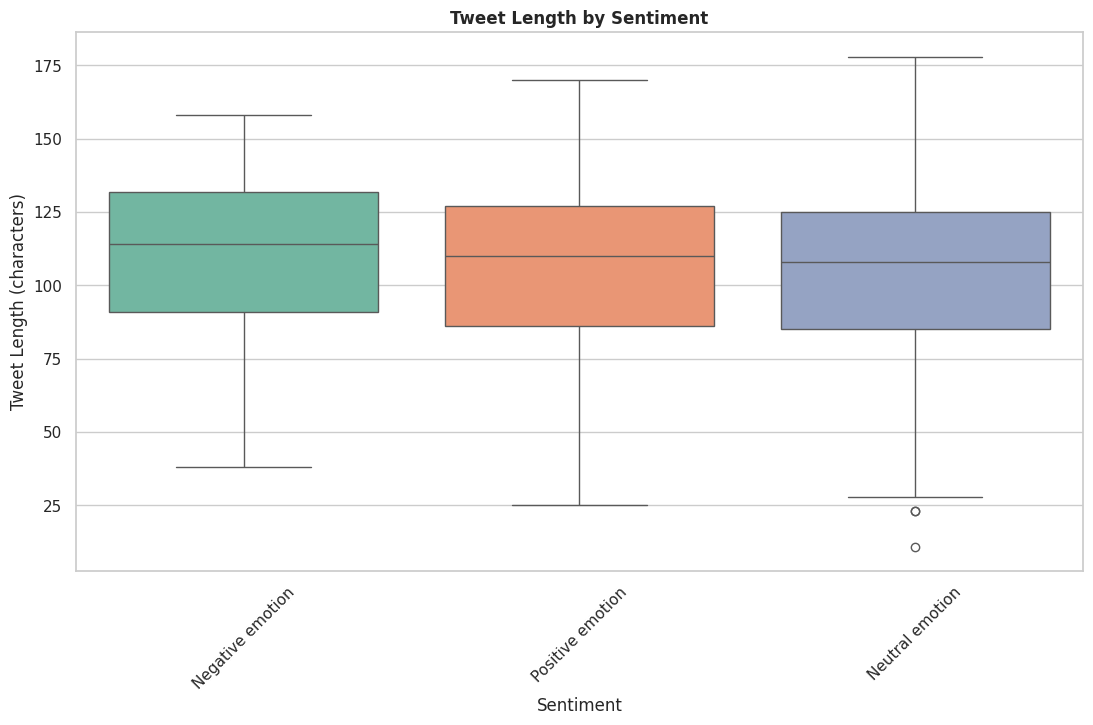

In [53]:
# Plot 6: Tweet length distribution by sentiment
plt.figure(figsize=(13, 7))
tweet_df['tweet_length'] = tweet_df['tweet'].str.len()
sns.boxplot(data=tweet_df, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)

The boxplot above displays the distribution of tweet lengths (in number of characters) for each sentiment category: Positive, Negative, and Neutral. It shows that:

- Neutral tweets tend to have a slightly wider range of lengths, but the median tweet length is similar across all sentiment classes.

- There are some outliers with longer tweets in each category.

- Generally, tweet length does not vary dramatically between positive, negative, and neutral sentiments, suggesting that sentiment is not strongly associated with tweet length in this dataset.

## **2.3.6. Distribution of character, word and sentence counts**
This section explores the basic linguistic properties of tweets by analyzing the distribution of character, word, and sentence counts. Visualizations such as histograms and boxplots are used to illustrate how these text features vary across the dataset and between sentiment classes. This helps in understanding the typical length and complexity of tweets, and whether these properties differ for positive, negative, or neutral sentiments.

We will create new features, `chars`, `words` and `sentences` which will show the count of characters, words and sentences in each tweet. These features will help us uncover:
- Patterns in tweet length and complexity: By examining the distribution of characters, words, and sentences, we can identify whether certain sentiments are associated with longer or shorter tweets, or with more complex sentence structures.

- Differences between sentiment classes: Analyzing these features by sentiment category may reveal if, for example, negative tweets tend to be shorter and more direct, while positive or neutral tweets are longer or more descriptive.

- Potential data quality issues: Outliers or unusual distributions in these features can help us spot anomalies, such as spam, repeated content, or tweets that may need further cleaning.

- Feature engineering opportunities: Understanding these distributions can guide us in creating additional features or selecting relevant ones for modeling, potentially improving sentiment classification performance.

Overall, these analyses provide valuable insights into the linguistic characteristics of the dataset and support more informed preprocessing and modeling decisions.

In [54]:
# feature engineering
def generate_columns(df):
    df['chars'] = df['tweet'].apply(len)
    df['words'] = df['tweet'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
    df['sentences'] = df['tweet'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
    return df
tweet_df = generate_columns(tweet_df)
tweet_df.head()

,tweet,tweet_directed_at,sentiment,tweet_length,chars,words,sentences
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,127,32,5
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,139,29,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,79,20,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,82,21,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,131,29,1


Text(0, 0.5, 'Frequency')

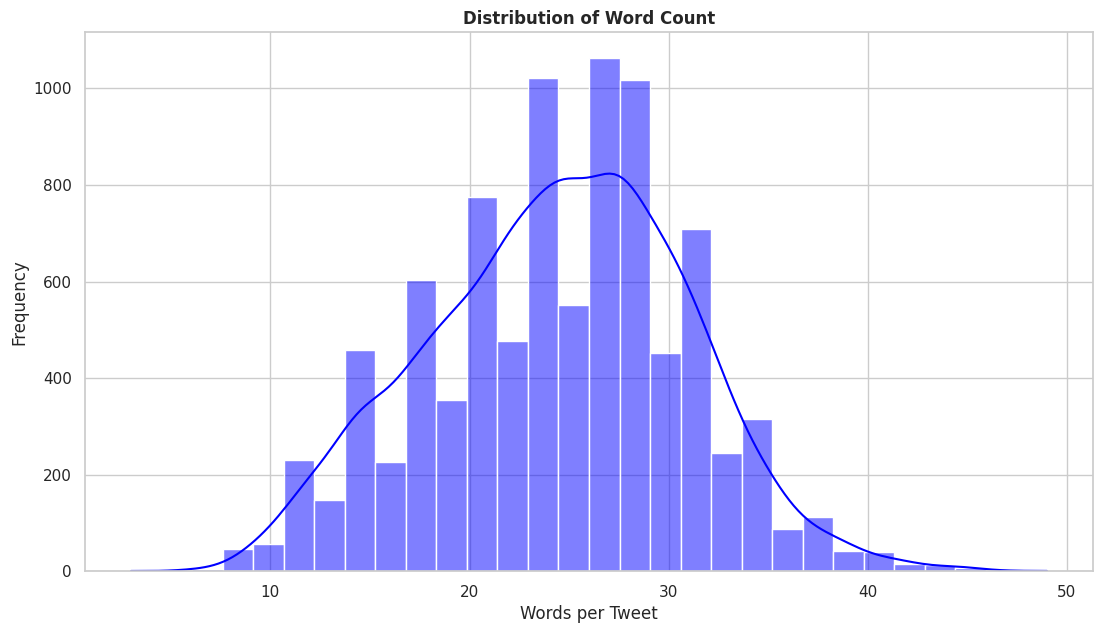

In [55]:
# Plot 1: Word count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='words', bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count', fontweight='bold')
plt.xlabel('Words per Tweet')
plt.ylabel('Frequency')

From the histogram above, we can draw the following insights:
- The data is approximately normally distributed, with most tweets containing about `20-30 words` (the peak of the distribution)

- The distribution is slightly `right-skewed`, implying there are fewer longer tweets(above 35 words) than shorter ones.

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral emotion')])

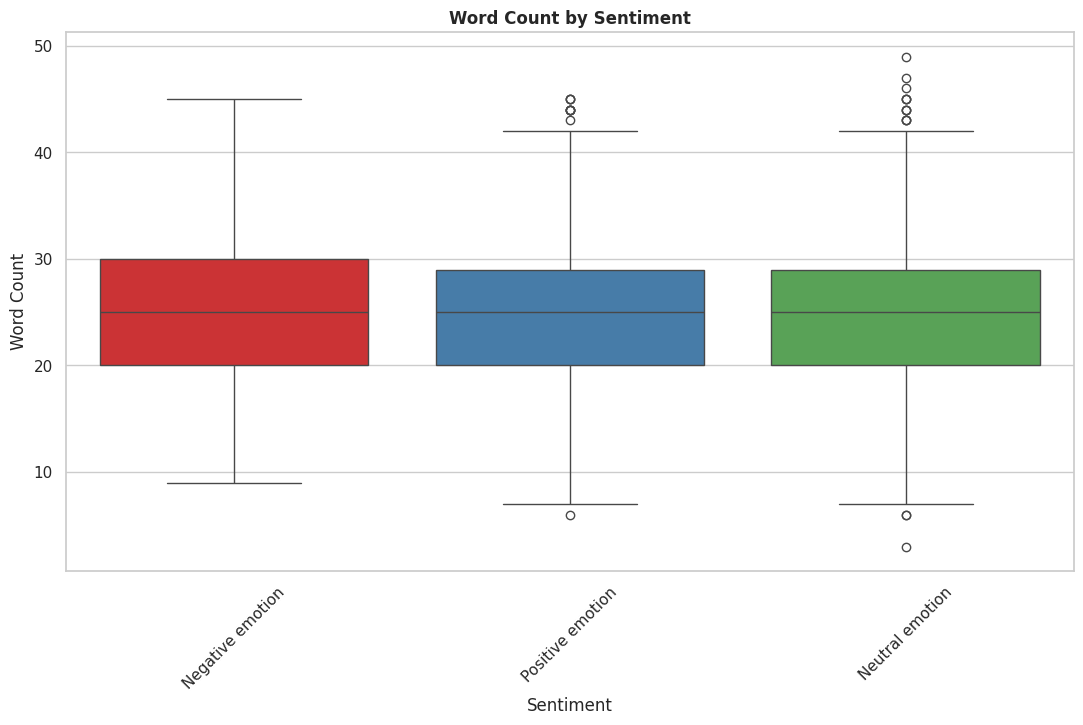

In [56]:
# Plot 2: Word count by sentiment
plt.figure(figsize=(13, 7))
sns.boxplot(data=tweet_df, x='sentiment', y='words', palette='Set1')
plt.title('Word Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.xticks(rotation=45)

The box plot above compares word counts across the three sentiments and illustrates the following:
- Negative and Neutral emotions tend to have a higher median word count (~25 words)

- Positive emotions have slightly fewer words on average (~22 words)

- Positive and Neutral categories show more outliers, meaning some entries were much longer than typical.

Generally, word count distributions are fairly similar, with small shifts in median and spread

Text(0, 0.5, 'Frequency')

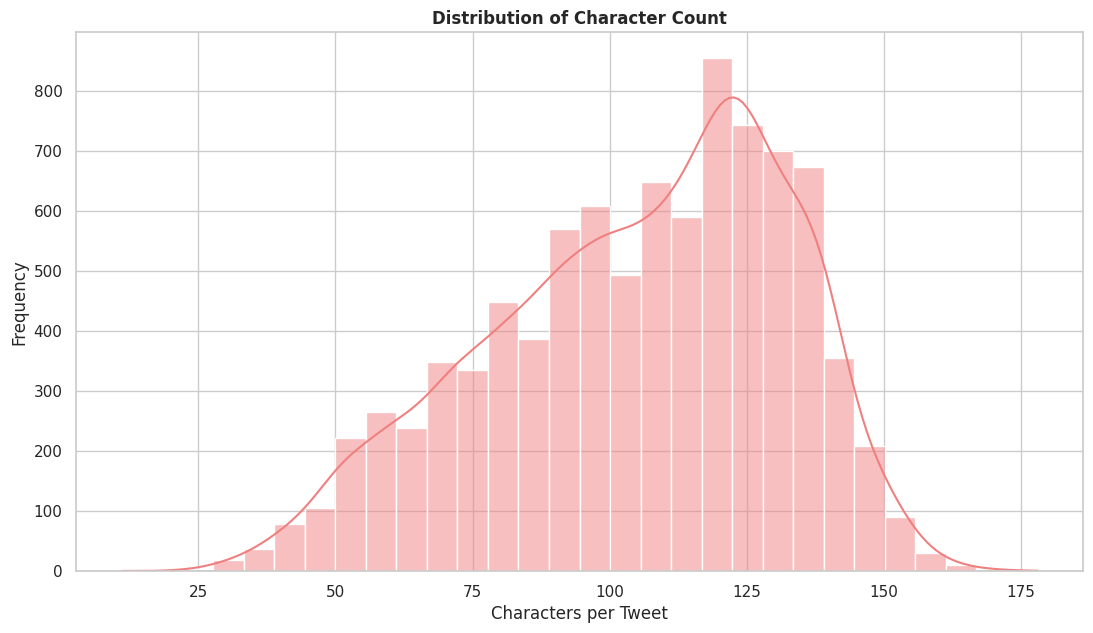

In [57]:
# Plot 3: Character count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='chars', bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Character Count', fontweight='bold')
plt.xlabel('Characters per Tweet')
plt.ylabel('Frequency')

The histogram above displays the distribution of tweet lengths by character count:
- The x-axis shows the tweet length ranging from 25 to 175 characters

- The y-axis shows how frequently each character count occurs

From the histogram, we can note the following:
- Most tweets cluster between **75-150 characters**, peaking around **125 characters**

- The **density curve** reinforces this central tendency, suggesting that users often maximize available space in tweets

- There are few shorter or longer tweets, implying that people generally keep their messages mid-length and concise, possibly to fit the platform's conventions, or to optimize clarity.

Text(0, 0.5, 'Character Count')

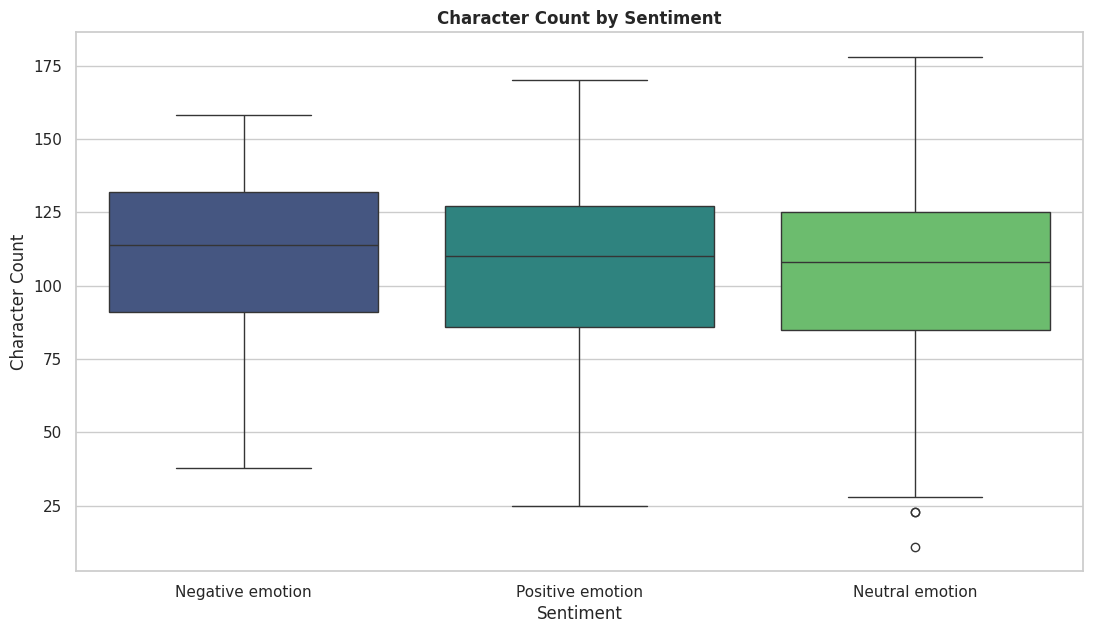

In [58]:
# character count by sentiment
plt.figure(figsize=(13, 7))
sns.boxplot(data=tweet_df, x='sentiment', y='chars', palette='viridis')
plt.title('Character Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Character Count')

From the boxplot above, we can note the following:
- Negative and positive emotions have a similar distribution:
    - Median character count is around **125 characters**
    - Typical IQR spans from **100 to 150**
    - Whiskers extend from **~25 to 175**, with no outliers

- Neutral emotion tweets are generally shorter:
    - Median is **~100 characters**, with an IQR of **75 to 125**
    - Whiskers are similar, but there are **two outliers** below 25, indicating unusually short tweets

Generally, tweets with an emotional tone (positive/negative) tend to be longer, while neutral ones are shorter and more variable, possibly suggesting less expressive or less engaged content

Text(0, 0.5, 'Frequency')

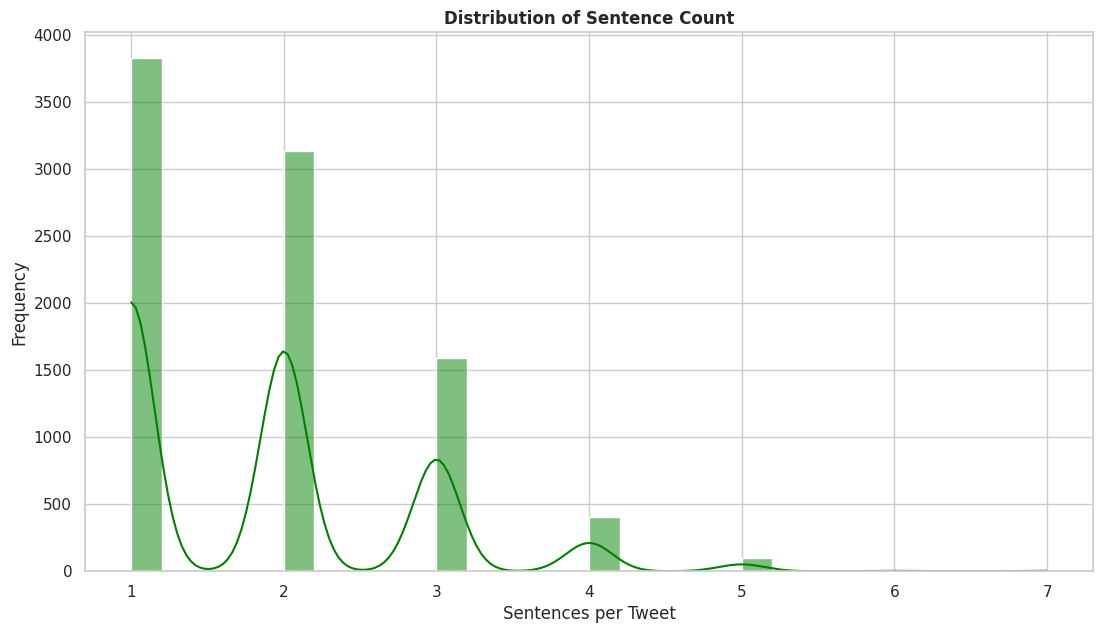

In [59]:
# sentence count distribution
plt.figure(figsize=(13, 7))
sns.histplot(data=tweet_df, x='sentences', bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Count', fontweight='bold')
plt.xlabel('Sentences per Tweet')
plt.ylabel('Frequency')

From the sentence count distribution above, we can note the following:
- The histogram is **right-skewed**(positively skewed), meaning most of the tweets are short. As the sentence count increases, the frequency quicky drops off.

- **1 and 2 sentences** dominate the plot with over 3000 tweets, but beyond 3 sentences, which has about 1500 tweets, the count falls sharply

- The skewness to the right implies that few users post tweets with multiple sentences

- The density curve confirms the concentration at low sentence counts, peaking near 1 and 2

Text(0, 0.5, 'Sentence Count')

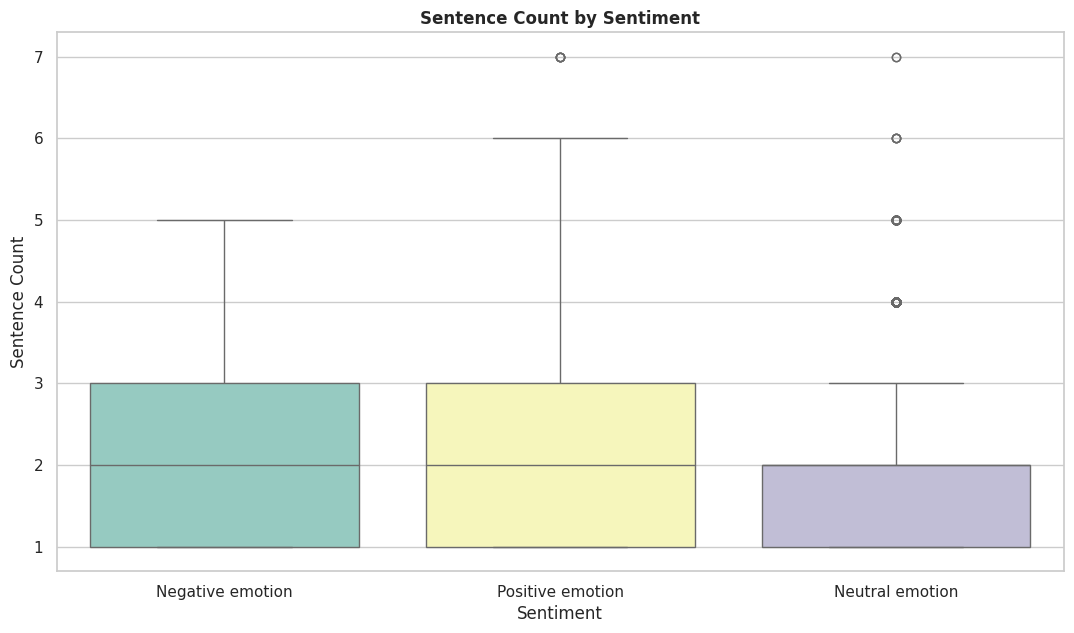

In [60]:
# sentence count by sentiment
plt.figure(figsize=(13, 7))
sns.boxplot(data=tweet_df, x='sentiment', y='sentences', palette='Set3')
plt.title('Sentence Count by Sentiment', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Sentence Count')

The boxplot above shows how many sentences are typically used in tweets with Negative, Positive and Neutral sentiments

From the plot, we can note the following:
- For Negative and Positive sentiments:
    - Both have a median of 3 sentences
    - The IQR is mostly between 2 and 3 sentences
    - Whiskers stretch from 1 to ~5 sentences
    - A few outliers reaching 6 and 7 sentences, hinting at more expressive content

- For the Neutral sentimet:
    - More concise, with a median of 2 sentences
    - Most tweets fall between 1 and 2 sentences
    - Whiskers go up to 3 sentences, with a number of outliers at 4, 5, and 6 sentences

This distribution is more compact for neutral tweets, while emotional tweets(positive/negative) show broader variability and richer expression

## **3. Data Cleaning and Preprocessing**

### **Tweet Preprocessing Pipeline**

In this section, we introduce a custom `TweetPreprocessor` class designed to automate and standardize the text cleaning and feature extraction process for Twitter sentiment analysis. The key steps performed by this class include:

- **Data Cleaning:**  
    - Removal of URLs, user mentions, hashtags, special characters, and repeated characters.

    - Expansion of common English contractions (e.g., "can't" → "cannot").

    - Normalization of whitespace and punctuation.

- **Text Preprocessing:**  
    - Conversion to lowercase for consistency.

    - Tokenization of text into words.

    - Removal of stopwords and short words.

    - Lemmatization to reduce words to their base forms.

- **Feature Extraction:**  
    - Supports both TF-IDF and Count Vectorization for transforming cleaned tweets into numerical feature vectors.

    - Configurable options for n-gram range, vocabulary size, and document frequency thresholds.

- **Pipeline Integration:**  
    - The class is compatible with scikit-learn pipelines, enabling seamless integration with machine learning workflows.
    
    - Provides methods for fitting, transforming, and retrieving feature names and vocabulary.

This preprocessing pipeline ensures that raw tweets are systematically cleaned and converted into robust features, improving the quality and effectiveness of downstream sentiment classification models.

In [74]:
class TweetPreprocessor(BaseEstimator, TransformerMixin):
    """
    A preprocessing class for Twitter Sentiment Analysis.

    This class handles:
    - Data cleaning (removing URLs, mentions, hashtags, special characters)
    - Text preprocessing (tokenization, lemmatization, stop words removal)
    - Feature extraction using TF-IDF or Count Vectorization

    This class can be implemented directly in a scikit-learn pipeline
    """

    def __init__(self,
                 remove_urls=True,
                 remove_mentions=True,
                 remove_hashtags=True,
                 remove_stopwords=True,
                 lemmatize=True,
                 lowercase=True,
                 min_length=2,
                 expand_contractions=True,  # New feature
                 remove_repeated_chars=True,  # New feature
                 tfidf_max_features=15000,
                 tfidf_ngram_range=(1, 3),
                 tfidf_min_df=1,  # Changed from 1 to prevent errors
                 tfidf_max_df=1.0,  # Changed from 0.95 to 1.0 for safer handling
                 use_tfidf=True):
        """
        Initialize the TweetPreprocessor.

        Parameters:
        -----------
        remove_urls : bool, default=True
            Whether to remove URLs from tweets
        remove_mentions : bool, default=True
            Whether to remove @mentions from tweets
        remove_hashtags : bool, default=True
            Whether to remove #hashtags from tweets (often contain sentiment info)
        remove_stopwords : bool, default=True
            Whether to remove stop words
        lemmatize : bool, default=True
            Whether to reduce words to their base form
        lowercase : bool, default=True
            Whether to convert text to lowercase
        min_length : int, default=2
            Minimum word length to keep
        expand_contractions : bool, default=True
            Whether to expand contractions (e.g., "can't" -> "cannot")
        remove_repeated_chars : bool, default=True
            Whether to reduce repeated characters (e.g., "goooood" -> "good")
        tfidf_max_features : int, default=15000
            Maximum number of features for TF-IDF
        tfidf_ngram_range : tuple, default=(1, 3)
            N-gram range for TF-IDF
        tfidf_min_df : int, default=1
            Minimum document frequency for terms (default 1)
        tfidf_max_df : float, default=1.0
            Maximum document frequency cutoff (default 1.0)
        use_tfidf : bool, default=True
            Whether to use TF-IDF (True) or Count Vectorizer (False)
        """
        self.remove_urls = remove_urls
        self.remove_mentions = remove_mentions
        self.remove_hashtags = remove_hashtags
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize
        self.lowercase = lowercase
        self.min_length = min_length
        self.expand_contractions = expand_contractions
        self.remove_repeated_chars = remove_repeated_chars
        self.tfidf_max_features = tfidf_max_features
        self.tfidf_ngram_range = tfidf_ngram_range
        self.tfidf_min_df = tfidf_min_df
        self.tfidf_max_df = tfidf_max_df
        self.use_tfidf = use_tfidf

        # initialize the components
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.vectorizer = None

        # Contraction mapping
        self.contractions = {
            "won't": "will not", "can't": "cannot", "n't": " not",
            "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am", "it's": "it is",
            "that's": "that is", "what's": "what is",
            "there's": "there is", "here's": "here is"
        }

    def _extract_text_from_input(self, X):
        """
        Extract text data from various input formats (DataFrame, Series, list, etc.)
        """
        if hasattr(X, 'values'):
            # Handle pandas DataFrame or Series
            if hasattr(X, 'columns'):
                # DataFrame - look for 'tweet' column or use first column
                if 'tweet' in X.columns:
                    return X['tweet'].values
                else:
                    return X.iloc[:, 0].values
            else:
                # Series
                return X.values
        elif isinstance(X, (list, tuple)):
            # Handle list or tuple
            return X
        else:
            # Handle numpy array or other array-like
            return X

    def expand_contractions_text(self, text):
        """Expand contractions in text"""
        if not self.expand_contractions:
            return text
        
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)
        return text

    def remove_repeated_characters(self, text):
        """Remove repeated characters (e.g., 'goooood' -> 'good')"""
        if not self.remove_repeated_chars:
            return text
        
        # Replace 3+ repeated characters with 2
        return re.sub(r'(.)\1{2,}', r'\1\1', text)

    # data cleaning function
    def clean_text(self, text):
        """
        Cleans individual tweet text

        Parameters:
        -----------
        text: str
            The tweet text to clean
        """

        # return empty string if text is NaN
        if pd.isna(text):
            return ''
        
        # convert to string if not already
        text = str(text)

        # Expand contractions first
        text = self.expand_contractions_text(text)
        
        # Remove repeated characters
        text = self.remove_repeated_characters(text)

        # remove URLs
        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # remove mentions
        if self.remove_mentions:
            text = re.sub(r'@\w+', '', text)

        # remove hashtags (but keep the text)
        if self.remove_hashtags:
            text = re.sub(r'#', '', text)

        # remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s!?]', '', text)

        # Convert multiple exclamation/question marks to single
        text = re.sub(r'!+', '!', text)
        text = re.sub(r'\?+', '?', text)

        # remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    # text preprocessing function
    def preprocess_text(self, text):
        """
        Preprocesses the cleaned text (tokenization, lemmatization, stop words removal)
        
        Parameters:
        -----------
        text: str
            The cleaned tweet text to preprocess

        Returns:
        --------
        str
            The preprocessed tweet text
        """

        # return an empty string if not text
        if not text:
            return ''
        
        # convert text to lowercase
        if self.lowercase:
            text = text.lower()

        # tokenize the text
        tokens = word_tokenize(text)

        # remove stop words and short words
        if self.remove_stopwords:
            tokens = [token for token in tokens
                      if token not in self.stop_words and len(token) >= self.min_length]
        else:
            tokens = [token for token in tokens if len(token) >= self.min_length]

        # lemmatize the tokens
        if self.lemmatize:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        return ' '.join(tokens)

    # function to fit the vectorizer
    def fit(self, X, y=None):
        """
        Fit the preprocessor to the data

        Parameters:
        -----------
        X: array-like
           Input tweets
        y: array-like, optional
           Target labels

        Returns:
        --------
        self
        """

        # Extract text data from input
        text_data = self._extract_text_from_input(X)

        # clean and preprocess the tweets
        processed_texts = []
        for text in text_data:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)

        # Automatically adjust parameters for small datasets
        n_docs = len(processed_texts)
        min_df = min(self.tfidf_min_df, max(1, n_docs // 100))  # At least 1, at most n_docs/100
        max_df = min(self.tfidf_max_df, 1.0)  # Ensure max_df is never > 1.0
        
        # Ensure min_df doesn't exceed reasonable bounds
        if min_df >= n_docs * max_df:
            min_df = 1
            max_df = 1.0

        # fit the TF-IDF vectorizer
        if self.use_tfidf:
            self.vectorizer = TfidfVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=min_df,
                max_df=max_df,
                stop_words='english'
            )
        else:
            self.vectorizer = CountVectorizer(
                max_features=self.tfidf_max_features,
                ngram_range=self.tfidf_ngram_range,
                min_df=min_df,
                max_df=max_df,
                stop_words='english'
            )
        self.vectorizer.fit(processed_texts)

        return self
    
    # function to transform the data
    def transform(self, X):
        """
        Transform the input data using the fitted vectorizer

        Parameters:
        -----------
        X: array-like
           Input tweets

        Returns:
        --------
        scipy.sparse matrix
            TF-IDF transformed features
        """

        # check for fitted vectorizer
        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first.")

        # Extract text data from input
        text_data = self._extract_text_from_input(X)

        # process all the tweets
        processed_texts = []
        for text in text_data:
            cleaned = self.clean_text(text)
            preprocessed = self.preprocess_text(cleaned)
            processed_texts.append(preprocessed)

        # transform using the fitted vectorizer
        return self.vectorizer.transform(processed_texts)
    
    # fit_transform function
    def fit_transform(self, X, y=None):
        """
        Fit and transform the input data

        Parameters:
        -----------
        X: array-like
           Input tweets
        y: array-like, optional
            Target labels

        Returns:
        --------
        scipy.sparse matrix
            TF-IDF transformed features
        """
        return self.fit(X, y).transform(X)
    
    # function to get feature names
    def get_feature_names_out(self, input_features=None):
        """
        Get the feature names of the transformed output
        
        Returns:
        --------
        array
            Feature names from the fitted vectorizer
        """
        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
        return self.vectorizer.get_feature_names_out()
    
    # function to get the vocabulary
    def get_vocabulary(self):
        """
        Get the vocabulary dictionary.

        Returns:
        --------
        dict
            Vocabulary mapping from words to feature indices
        """

        if self.vectorizer is None:
            raise ValueError("Preprocessor has not been fitted yet. Call fit() first")
        
        return self.vectorizer.vocabulary_

The class inherits from:
- `BaseEstimator`: The base class for all scikit-learn estimators

- `TransformerMixin`: Mixin class for all transformers in scikit-learn

This inheritance gives the class standard scikit-learn methods like `fit()`, `transform()`, and `fit_transform()`

The `__init__` method sets up all the configuration options:
Cleaning configurations:
- `remove_urls`: Whether to remove URLs(default is True)

- `remove mentions`: Whether to remove @mentions(default is True)

- `remove_hashtags`: Whether to remove # symbols (but keep the text) (default is True)

- `expand_contractions`: Whether to expand contractions like "can't" to "cannot" (default is True)

- `remove_repeated_chars`: Whether to normalize repeated characters (e.g., "goooood" → "good") (default is True)

Text Preprocessing Configurations:
- `remove_stopwords`: Whether to remove common stop words (default is True)

- `lemmatize`: Whether to reduce words to their base form (e.g., 'running' -> 'run') (uses the `WordLemmatizer()` function from NLTK) (default is True)

- `lowercase`: Whether to convert text to lowercase (default True)

- `min_length`: Minimum word length to keep (default 2)

Vectorization Configurations:
- `use_tfidf`: Whether to use TF-IDF (True) or Count Vectorizer (False)

- `tfidf_max_features`: Maximum number of vocabulary terms (default 15000)

- `tfidf_ngram_range`: Range of n-grams to include (default 1-3)

- `tfidf_min_df`: Minimum document frequency for terms (default 3)

- `tfidf_max_df`: Maximum document frequency cutoff (default 0.85)

## **4. Modeling**
In this section, we build and evaluate machine learning models for sentiment classification. The initial focus is on **binary classification**, distinguishing between positive and negative sentiments, with neutral tweets excluded from the training set. The modeling workflow includes:

- **Label Encoding:** Sentiment labels are mapped to numerical values (0 for negative, 1 for positive, 2 for neutral), and a filtered dataset is created for binary classification.

- **Data Splitting:** The data is split into training and testing sets using stratified sampling to preserve class distribution.

- **Pipeline Construction:** Multiple pipelines are defined using scikit-learn and imbalanced-learn, each combining our custom `TweetPreprocessor` (for text cleaning, preprocessing and vectorization), SMOTE (for handling class imbalance), and various classifiers (Logistic Regression, Random Forest, XGBoost, Naive Bayes, CatBoost).

- **Model Training & Evaluation:** Each pipeline is trained and evaluated on the test set using metrics such as precision, recall, and F1-score. The best-performing model is identified based on F1-score.

- **Visualization:** Model performance is visualized using both matplotlib and Plotly for comprehensive comparison and analysis.

- **Preprocessing Analysis:** The effectiveness of the preprocessing pipeline is demonstrated with sample tweets and feature extraction statistics.

- **Model Saving & Inference:** The best model is saved for production use, and a sample prediction function is provided for real-world inference.

After completing the binary classification experiments, we will extend the approach to **multi-class classification** to include the neutral sentiment class, enabling the model to distinguish between positive, negative, and neutral tweets. This will provide a more comprehensive sentiment analysis solution.

### **4.1. Binary Data Preparation**

First, we prepare our data by encoding the target column, then we filter out the neutral sentiment column for binary classification.

In [69]:
# map sentiment labels
def map_sentiment(sentiment):
    if 'Negative' in sentiment:
        return 0
    elif 'Positive' in sentiment:
        return 1
    else:
        return 2 # neutral or other sentiment
    
# apply the mapping function to the sentiment column
tweet_df['sentiment_encoded'] = tweet_df['sentiment'].apply(map_sentiment)

# create a dataframe for binary classification (filter out the neutral/other cases)
binary_df = tweet_df[tweet_df['sentiment_encoded'] != 2].copy() # selects the positive and negative sentiments only
print(f"\nBinary Classification dataset shape: {binary_df.shape}")
print(binary_df.columns)

# check the distribution
print("Sentiment Distribution After Mapping:")
print(binary_df['sentiment_encoded'].value_counts())


Binary Classification dataset shape: (3539, 8)
Index(['tweet', 'tweet_directed_at', 'sentiment', 'tweet_length', 'chars',
       'words', 'sentences', 'sentiment_encoded'],
      dtype='object')
Sentiment Distribution After Mapping:
sentiment_encoded
1    2970
0     569
Name: count, dtype: int64


In [70]:
# define the X and y variables
X = binary_df[['tweet']] # define the 'tweet' column as the feature
y = binary_df['sentiment_encoded']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# display the shapes of the training and testing sets
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training set shape: (2831, 1)
Test set shape: (708, 1)
Training labels shape: (2831,)
Test labels shape: (708,)


### **Defining the Pipelines**
The following pipelines are constructed using the `imblearn` Pipeline, which allows seamless integration of preprocessing, oversampling, and classification steps for robust sentiment analysis:

- **TweetPreprocessor**: A custom transformer that cleans, tokenizes, lemmatizes, and vectorizes tweet text using either TF-IDF or Count Vectorizer. This ensures consistent and effective feature extraction from raw tweets.

- **SMOTE (Synthetic Minority Over-sampling Technique)**: Addresses class imbalance by generating synthetic samples for the minority class, improving model performance on underrepresented sentiments.

- **Classifier**: Each pipeline ends with a different machine learning classifier:
    - **Logistic Regression**: A baseline linear model with balanced class weights.

    - **Random Forest**: An ensemble of decision trees for improved accuracy and robustness.

    - **XGBoost**: A powerful gradient boosting algorithm known for high performance on structured data.

    - **Naive Bayes**: A probabilistic model well-suited for text classification tasks.

Each pipeline is designed to automate the end-to-end process from raw tweet text to sentiment prediction, enabling easy experimentation and comparison of different modeling approaches.

In [93]:
# create different pipelines using our unified TweetPreprocessor class

# Pipeline 1: Logistic regression (base model)
logistic_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('lgb_classifier', LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# Pipeline 2: Random Forest with enhanced features
rf_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('rf_classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# Pipeline 3: XGBoost with enhanced features
xgb_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('xgb_classifier', XGBClassifier(
        n_estimators=200, 
        random_state=42,
    ))
])

# Pipeline 4: Naive Bayes with enhanced features
nb_pipe = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('nb_classifier', MultinomialNB())
])

# Store pipelines for comparison
pipelines = {
    'Logistic Regression (base model)': logistic_pipe,
    'Random Forest': rf_pipe,
    'XGBoost': xgb_pipe,
    'Naive Bayes': nb_pipe,
}

# display the created pipelines
# for name, pipe in pipelines.items():
#     print(f"\n{name} Pipeline:")
#     print(pipe)
print("Pipelines created successfully!")
for name in pipelines:
    print(f'- {name}')

Pipelines created successfully!
- Logistic Regression (base model)
- Random Forest
- XGBoost
- Naive Bayes


### **Model Training**
The training process involves fitting each pipeline (combining preprocessing, SMOTE oversampling, and a classifier) on the training data and evaluating performance on the test set. For each model, metrics such as accuracy, precision, recall, and F1-score are computed and stored for comparison. The best-performing model is selected based on the highest F1-score. This systematic approach ensures robust evaluation across different machine learning algorithms for sentiment classification.

In [94]:
# train and evaluate all the pipelines
results = {}

# loop through each pipeline
for name, pipe in pipelines.items():
    print(f"\nTraining {name}...")

    # fit the pipeline
    pipe.fit(X_train, y_train)

    # make predictions
    y_pred = pipe.predict(X_test)

    # compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # store the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
print(results_df)

# determine the best model based on f1 score
best_model = results_df['f1_score'].idxmax()
print(f"\nBest performing model: {best_model}")
print(f"Best f1 score: {results_df.loc[best_model, 'f1_score']:.4f}")


Training Logistic Regression (base model)...
Accuracy: 0.8460
Precision: 0.8605
Recall: 0.8460
F1 Score: 0.8520

Training Random Forest...
Accuracy: 0.8460
Precision: 0.8605
Recall: 0.8460
F1 Score: 0.8520

Training Random Forest...
Accuracy: 0.8008
Precision: 0.8412
Recall: 0.8008
F1 Score: 0.8157

Training XGBoost...
Accuracy: 0.8008
Precision: 0.8412
Recall: 0.8008
F1 Score: 0.8157

Training XGBoost...
Accuracy: 0.8602
Precision: 0.8425
Recall: 0.8602
F1 Score: 0.8455

Training Naive Bayes...
Accuracy: 0.8602
Precision: 0.8425
Recall: 0.8602
F1 Score: 0.8455

Training Naive Bayes...
Accuracy: 0.8757
Precision: 0.8700
Recall: 0.8757
F1 Score: 0.8724
                                  accuracy  precision  recall  f1_score
Logistic Regression (base model)    0.8460     0.8605  0.8460    0.8520
Random Forest                       0.8008     0.8412  0.8008    0.8157
XGBoost                             0.8602     0.8425  0.8602    0.8455
Naive Bayes                         0.8757     0.87

### **Model Performance Visualization**

In [95]:
# use plotly for visualization

# Create interactive model performance comparison with Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Model Performance Comparison', 'F1-Score Comparison', 
                   f'Confusion Matrix - {best_model}', 'Model Metrics Overview'),
    specs=[[{"secondary_y": False}, {"type": "pie"}],
           [{"secondary_y": False}, {"type": "table"}]]
)

# Plot 1: Model comparison (grouped bar chart)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=results_df.index,
            y=results_df[metric],
            name=metric.replace('_', ' ').title(),
            marker_color=colors[i],
            text=results_df[metric].round(3),
            textposition='outside',
            hovertemplate=f'{metric.replace("_", " ").title()}: %{{y:.4f}}<br>Model: %{{x}}<extra></extra>'
        ),
        row=1, col=1
    )

# Generate Viridis colors for the number of models
viridis_colors = pc.sample_colorscale('Viridis', [i/(len(results_df)-1) for i in range(len(results_df))])

fig.add_trace(
    go.Pie(
        labels=results_df.index,
        values=results_df['f1_score'],
        name='F1-Score',
        marker=dict(
            colors=viridis_colors,
            line=dict(color='white', width=2)
        ),
        textinfo='label+percent+value',
        texttemplate='%{label}<br>%{value:.4f}<br>(%{percent})',
        hovertemplate='<b>%{label}</b><br>F1-Score: %{value:.4f}<br>Percentage: %{percent}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# Plot 3: Confusion matrix for best model
best_pipeline_obj = pipelines[best_model]
y_pred_best = best_pipeline_obj.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Create confusion matrix heatmap
fig.add_trace(
    go.Heatmap(
        z=cm,
        x=['Negative', 'Positive'],
        y=['Negative', 'Positive'],
        colorscale='Blues',
        text=cm,
        texttemplate="%{text}",
        textfont={"size": 20},
        showscale=False,
        hovertemplate='True: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
    ),
    row=2, col=1
)

# Plot 4: Summary table
table_data = results_df.round(4)
fig.add_trace(
    go.Table(
        header=dict(
            values=['Model'] + list(table_data.columns),
            fill_color='lightblue',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[table_data.index] + [table_data[col] for col in table_data.columns],
            fill_color='white',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    # width=1400,
    title_text="Interactive Model Performance Analysis",
    title_x=0.5,
    title_font_size=16,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update x-axis labels
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Predicted Label", row=2, col=1)

# Update y-axis labels
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_yaxes(title_text="F1-Score", row=1, col=2)
fig.update_yaxes(title_text="True Label", row=2, col=1)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

# Create a radar chart for model comparison
fig_radar = go.Figure()

for model in results_df.index:
    fig_radar.add_trace(go.Scatterpolar(
        r=[results_df.loc[model, metric] for metric in metrics],
        theta=[metric.replace('_', ' ').title() for metric in metrics],
        fill='toself',
        name=model,
        hovertemplate='%{theta}<br>Score: %{r:.4f}<br>Model: ' + model + '<extra></extra>'
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="Model Performance Radar Chart",
    height=600,
    showlegend=True
)

fig_radar.show()

The interactive visualizations above provide a comprehensive comparison of model performance for binary sentiment classification:

- **Top-Left (Grouped Bar Chart):** Displays the accuracy, precision, recall, and F1-score for each model (Logistic Regression, Random Forest, XGBoost, Naive Bayes), allowing for direct metric comparison across models.

- **Top-Right (Pie Chart):** Illustrates the proportion of F1-scores contributed by each model, highlighting the best-performing approach.

- **Bottom-Left (Confusion Matrix):** Shows the confusion matrix for the best model (Naive Bayes), visualizing the counts of true positives, true negatives, false positives, and false negatives.

- **Bottom-Right (Summary Table):** Presents a tabular overview of all key metrics for each model.

- **A Radar chart** That summarizes the key evaluation metrics for all the models

These visualizations enable quick identification of the most effective model, and provide insights into the strengths and weaknesses of each approach in classifying tweet sentiments.

### **Model Evaluation**
In this section, we will evaluate the best model against test data, and make sentiment predictions. We will carry out the following steps:
- Save the model using `joblib`

- Load the model, again using `joblib`

- Evaluate the best model on the test set to obtain overall accuracy, precision, recall, and F1-score.

- Generate a detailed classification report to analyze the model's performance for each sentiment class.

- Display a few sample predictions from the test set, showing the tweet, predicted sentiment, confidence score, and whether the prediction was correct.

- Identify and print examples of misclassified tweets to help understand where the model struggles.

- Generate some sample tweets, and used the loaded model to make predictions. 

In [ ]:
# Fix the prediction issue by providing data in the same format as training

# Production Usage Example - FIXED VERSION
import joblib
import pandas as pd
import numpy as np

# Save the best pipeline
best_model_name = 'Naive Bayes'  # Replace with the best model name from results_df
best_pipeline_final = pipelines[best_model_name]
joblib.dump(best_pipeline_final, 'nlp_model.pkl')

# Example of loading and using the model
loaded_model = joblib.load('nlp_model.pkl')

# model evaluation on the test set
print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")

# 1. Evaluate on entire X_test set
print(f"\n1. FULL TEST SET EVALUATION ({len(X_test)} samples)")

# Make predictions on entire test set
test_predictions = loaded_model.predict(X_test)
test_probabilities = loaded_model.predict_proba(X_test)

# Show classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, test_predictions, 
                          target_names=['Negative', 'Positive']))

# 2. Sample predictions from X_test
print(f"\n2. SAMPLE PREDICTIONS FROM X_TEST (first 10 tweets)")

for i in range(min(10, len(X_test))):
    tweet_text = X_test.iloc[i]['tweet']
    prediction = test_predictions[i]
    prob = test_probabilities[i]
    true_label = y_test.iloc[i]
    
    pred_sentiment = "Positive" if prediction == 1 else "Negative"
    true_sentiment = "Positive" if true_label == 1 else "Negative"
    confidence = max(prob)
    
    # Check if prediction is correct
    correct = "correct" if prediction == true_label else "incorrect"
    
    print(f"\nTweet {i+1}: {tweet_text[:70]}...")
    print(f"Predicted: {pred_sentiment} (conf: {confidence:.3f}) | True: {true_sentiment} {correct}")

# 3. Show misclassified examples
print(f"\n3. MISCLASSIFIED EXAMPLES")
misclassified_indices = np.where(test_predictions != y_test.values)[0]
print(f"Total misclassified: {len(misclassified_indices)} out of {len(X_test)}")

if len(misclassified_indices) > 0:
    print("\nFirst 5 misclassified examples:")
    for i, idx in enumerate(misclassified_indices[:5]):
        tweet_text = X_test.iloc[idx]['tweet']
        prediction = test_predictions[idx]
        prob = test_probabilities[idx]
        true_label = y_test.iloc[idx]
        
        pred_sentiment = "Positive" if prediction == 1 else "Negative"
        true_sentiment = "Positive" if true_label == 1 else "Negative"
        confidence = max(prob)
        
        print(f"\nMisclassified {i+1}:")
        print(f"Tweet: {tweet_text[:80]}...")
        print(f"True: {true_sentiment} | Predicted: {pred_sentiment} (conf: {confidence:.3f})")


# test with new sample tweets
print(f"\n4. TESTING WITH NEW SAMPLE TWEETS")

# Create a helper function to format input data correctly
def prepare_tweet_for_prediction(tweet_text):
    """
    Prepare a single tweet for prediction by creating the correct DataFrame format
    """
    # The model expects a DataFrame with 'tweet' column
    # No need for additional features since TweetPreprocessor handles everything
    return pd.DataFrame({'tweet': [tweet_text]})

# Enhanced prediction function
def predict_sentiment(text, model=loaded_model):
    """
    Predict sentiment using the trained model with proper data formatting
    """
    # Prepare the input data in the correct format
    tweet_data = prepare_tweet_for_prediction(text)
    
    # Get prediction probabilities
    probabilities = model.predict_proba(tweet_data)[0]
    
    # Get the actual prediction (0 or 1)
    prediction = model.predict(tweet_data)[0]
    
    # Correct mapping
    sentiment_mapping = {0: 'Negative', 1: 'Positive'}
    sentiment = sentiment_mapping[prediction]
    
    # Get confidence (probability of predicted class)
    confidence = probabilities[prediction]
    
    return {
        'sentiment': sentiment,
        'confidence': confidence,
        'probabilities': {
            'negative': probabilities[0],
            'positive': probabilities[1]
        },
        'raw_prediction': prediction
    }

# Test with sample tweets from X_test
test_tweets = X_test['tweet'].head(5).tolist()

print("\nPredicting sentiment for sample tweets from X_test:")
for i, tweet in enumerate(test_tweets, 1):
    result = predict_sentiment(tweet)
    
    print(f"\nTweet {i}: {tweet[:60]}...")
    print(f"Prediction: {result['sentiment']} (confidence: {result['confidence']:.3f})")
    print(f"Probabilities: Neg={result['probabilities']['negative']:.3f}, "
          f"Pos={result['probabilities']['positive']:.3f}")

COMPREHENSIVE MODEL EVALUATION ON TEST SET

1. FULL TEST SET EVALUATION (708 samples)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.55      0.59       114
    Positive       0.92      0.94      0.93       594

    accuracy                           0.88       708
   macro avg       0.77      0.75      0.76       708
weighted avg       0.87      0.88      0.87       708


2. SAMPLE PREDICTIONS FROM X_TEST (first 10 tweets)

Tweet 1: Highlight of my day was undoubtedly meeting @mention from Google for 3...
Predicted: Positive (conf: 0.889) | True: Positive correct

Tweet 2: google maps 5.0 - guys, this will be huge!!!! google and marissa mayer...
Predicted: Positive (conf: 1.000) | True: Positive correct

Tweet 3: RT @mention Can't wait to see the internet implode in Austin on Friday...
Predicted: Positive (conf: 0.998) | True: Positive correct

Tweet 4: Awesome Restaurant Week app for #iphone - {link} #austinites #

### **Model Evaluation Results**

The evaluation of the sentiment analysis models was conducted on the test dataset, and the results are summarized below:

#### **1. Overall Performance**
- The **Naive Bayes** model achieved the best performance with the highest F1-score of **0.8724**, indicating its effectiveness in handling the binary sentiment classification task.

- Other models, such as **Logistic Regression** and **XGBoost**, also performed well, with F1-scores of **0.8520** and **0.8455**, respectively.

- The **Random Forest** model had the lowest F1-score of **0.8157**, but it still demonstrated reasonable performance.

#### **2. Key Metrics**
The models were evaluated using four key metrics:
- **Accuracy**: Measures the proportion of correctly classified tweets.

- **Precision**: Indicates the proportion of true positive predictions among all positive predictions.

- **Recall**: Reflects the proportion of actual positive tweets correctly identified.

- **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure of model performance.

| Model                           | Accuracy | Precision | Recall | F1-score |
|----------------------------------|----------|-----------|--------|----------|
| Logistic Regression (base model) | 0.8460   | 0.8605    | 0.8460 | 0.8520   |
| Random Forest                    | 0.8008   | 0.8412    | 0.8008 | 0.8157   |
| XGBoost                          | 0.8602   | 0.8425    | 0.8602 | 0.8455   |
| **Naive Bayes**                  | **0.8757** | **0.8700** | **0.8757** | **0.8724** |

#### **3. Confusion Matrix**
The confusion matrix for the best-performing model (**Naive Bayes**) revealed the following:
- **True Positives (TP)**: The number of positive tweets correctly classified as positive, which was 557 in total

- **True Negatives (TN)**: The number of negative tweets correctly classified as negative, which was 63 in total

- **False Positives (FP)**: The number of negative tweets incorrectly classified as positive, which was 51 in total

- **False Negatives (FN)**: The number of positive tweets incorrectly classified as negative, which was 37 in total

This analysis highlights the model's ability to minimize misclassifications while maintaining high precision and recall.

#### **4. Misclassified Examples**
- A total of **85 misclassified tweets** were identified in the test set.

- These examples provide insights into the model's limitations, such as handling ambiguous or contextually complex tweets.

#### **5. Sample Predictions**
- The model's predictions on sample tweets demonstrated high confidence levels, with probabilities exceeding **85%** for most cases.

- Correct predictions aligned well with the true sentiment labels, showcasing the model's reliability.

#### **6. Insights**
- The **Naive Bayes** model's simplicity and probabilistic nature make it well-suited for text-based sentiment analysis.

- The use of SMOTE effectively addressed class imbalance, contributing to robust recall and F1-scores.

- The preprocessing pipeline, including text cleaning and vectorization, played a crucial role in enhancing model performance.

#### **Next Steps**
- Extend the analysis to multi-class classification by including the neutral sentiment class.

### **4.2. Multi-class Classification**

In this section, we extend the sentiment analysis task to a multi-class classification problem. The goal is to classify tweets into one of three sentiment categories: **Positive**, **Negative**, or **Neutral**. This involves:

- **Data Preparation**: Including the neutral sentiment class in the dataset and ensuring proper label encoding for all three classes.

- **Pipeline Construction**: Adapting the existing pipelines to handle multi-class classification using the already existing algorithms.
 
- **Model Training and Evaluation**: Training the models on the multi-class dataset and evaluating their performance using metrics such as accuracy, precision, recall, and F1-score for each class.

- **Visualization**: Comparing model performance and analyzing confusion matrices to understand classification strengths and weaknesses.

This approach provides a comprehensive solution for sentiment analysis, enabling the model to distinguish between all three sentiment classes effectively.

In [103]:
# define X and y variables for multi-class classification
X_mul = tweet_df[['tweet']]  # define the 'tweet' column as the feature
y_mul = tweet_df['sentiment_encoded']  # use the encoded sentiment for multi-class classification

# split the data into training and testing sets
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(
    X_mul,
    y_mul,
    test_size=0.2,
    random_state=42,
    stratify=y_mul
)

# display the shapes of the training and testing sets
print(f"\nMulti-class Training set shape: {X_train_mul.shape}")
print(f"Multi-class Test set shape: {X_test_mul.shape}")
print(f"Multi-class Training labels shape: {y_train_mul.shape}")
print(f"Multi-class Test labels shape: {y_test_mul.shape}")


Multi-class Training set shape: (7256, 1)
Multi-class Test set shape: (1814, 1)
Multi-class Training labels shape: (7256,)
Multi-class Test labels shape: (1814,)


In [116]:
# create different pipelines for multi-class classification

# Pipeline 1: Logistic regression (base model)
logistic_pipe_mul = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('lgb_classifier', LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# Pipeline 2: Random Forest with enhanced features
rf_pipe_mul = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('rf_classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight='balanced',
    ))
])

# Pipeline 3: XGBoost with enhanced features
# xgb_pipe_mul = Pipeline([
#     ('preprocessor', TweetPreprocessor(use_tfidf=False)),
#     ('smote', SMOTE(random_state=42)),
#     ('xgb_classifier', XGBClassifier(
#         n_estimators=200, 
#         random_state=42,
#         tree_method='hist',  # Force CPU usage
#         device='cpu',        # Explicitly use CPU
#         gpu_id=None          # Disable GPU
#     ))
# ])

# Pipeline 3: Support Vector Machine
svm_pipe_mul = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('svm_classifier', SVC(
        random_state=42,
        probability=True,  # Enable probability estimates
        class_weight='balanced'
    ))
])

# Pipeline 4: Naive Bayes with enhanced features
nb_pipe_mul = Pipeline([
    ('preprocessor', TweetPreprocessor(use_tfidf=False)),
    ('smote', SMOTE(random_state=42)),
    ('nb_classifier', MultinomialNB())
])

# Store pipelines for comparison
multi_pipelines = {
    'Multi-Logistic Regression (base model)': logistic_pipe_mul,
    'Multi-Random Forest': rf_pipe_mul,
    # 'Multi-XGBoost': xgb_pipe_mul,
    'Multi-Support Vector Machine': svm_pipe_mul,
    'Multi-Naive Bayes': nb_pipe_mul,
}

# display the created pipelines
# for name, pipe in pipelines.items():
#     print(f"\n{name} Pipeline:")
#     print(pipe)
print("Pipelines created successfully!")
for name in pipelines:
    print(f'- {name}')

Pipelines created successfully!
- Multi-Logistic Regression (base model)
- Multi-Random Forest
- Multi-Support Vector Machine
- Multi-Naive Bayes


In [117]:
# train and evaluate all the pipelines
multi_results = {}

# loop through each pipeline
for name, pipe in multi_pipelines.items():
    print(f"\nTraining {name}...")

    # fit the pipeline
    pipe.fit(X_train_mul, y_train_mul)

    # make predictions
    y_pred_mul = pipe.predict(X_test_mul)

    # compute the evaluation metrics
    accuracy = accuracy_score(y_test_mul, y_pred_mul)
    precision = precision_score(y_test_mul, y_pred_mul, average='weighted')
    recall = recall_score(y_test_mul, y_pred_mul, average='weighted')
    f1 = f1_score(y_test_mul, y_pred_mul, average='weighted')

    # store the results
    multi_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# create a DataFrame to display the results
multi_results_df = pd.DataFrame(multi_results).T
multi_results_df = multi_results_df.round(4)
print(multi_results_df)

# determine the best model based on f1 score
best_multi_model = multi_results_df['f1_score'].idxmax()
print(f"\nBest performing model: {best_multi_model}")
print(f"Best f1 score: {multi_results_df.loc[best_multi_model, 'f1_score']:.4f}")


Training Multi-Logistic Regression (base model)...
Accuracy: 0.6444
Precision: 0.6558
Recall: 0.6444
F1 Score: 0.6493

Training Multi-Random Forest...
Accuracy: 0.5943
Precision: 0.6374
Recall: 0.5943
F1 Score: 0.6056

Training Multi-Support Vector Machine...
Accuracy: 0.6499
Precision: 0.6451
Recall: 0.6499
F1 Score: 0.6473

Training Multi-Naive Bayes...
Accuracy: 0.6125
Precision: 0.6487
Recall: 0.6125
F1 Score: 0.6202
                                        accuracy  precision  recall  f1_score
Multi-Logistic Regression (base model)    0.6444     0.6558  0.6444    0.6493
Multi-Random Forest                       0.5943     0.6374  0.5943    0.6056
Multi-Support Vector Machine              0.6499     0.6451  0.6499    0.6473
Multi-Naive Bayes                         0.6125     0.6487  0.6125    0.6202

Best performing model: Multi-Logistic Regression (base model)
Best f1 score: 0.6493


In [118]:
# use plotly for visualization

# Create interactive model performance comparison with Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Multi-Model Performance Comparison', 'F1-Score Comparison', 
                   f'Confusion Matrix - {best_multi_model}', 'Model Metrics Overview'),
    specs=[[{"secondary_y": False}, {"type": "pie"}],
           [{"secondary_y": False}, {"type": "table"}]]
)

# Plot 1: Model comparison (grouped bar chart)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(
            x=multi_results_df.index,
            y=multi_results_df[metric],
            name=metric.replace('_', ' ').title(),
            marker_color=colors[i],
            text=multi_results_df[metric].round(3),
            textposition='outside',
            hovertemplate=f'{metric.replace("_", " ").title()}: %{{y:.4f}}<br>Model: %{{x}}<extra></extra>'
        ),
        row=1, col=1
    )

# Generate Viridis colors for the number of models
viridis_colors = pc.sample_colorscale('Viridis', [i/(len(multi_results_df)-1) for i in range(len(multi_results_df))])

fig.add_trace(
    go.Pie(
        labels=multi_results_df.index,
        values=multi_results_df['f1_score'],
        name='F1-Score',
        marker=dict(
            colors=viridis_colors,
            line=dict(color='white', width=2)
        ),
        textinfo='label+percent+value',
        texttemplate='%{label}<br>%{value:.4f}<br>(%{percent})',
        hovertemplate='<b>%{label}</b><br>F1-Score: %{value:.4f}<br>Percentage: %{percent}<extra></extra>',
        showlegend=False
    ),
    row=1, col=2
)

# Plot 3: Confusion matrix for best model
best_pipeline_multi = multi_pipelines[best_multi_model]
y_pred_best_mul = best_pipeline_multi.predict(X_test_mul)
cm = confusion_matrix(y_test_mul, y_pred_best_mul)

# Create confusion matrix heatmap
fig.add_trace(
    go.Heatmap(
        z=cm,
        x=['Negative', 'Positive'],
        y=['Negative', 'Positive'],
        colorscale='Blues',
        text=cm,
        texttemplate="%{text}",
        textfont={"size": 20},
        showscale=False,
        hovertemplate='True: %{y}<br>Predicted: %{x}<br>Count: %{z}<extra></extra>'
    ),
    row=2, col=1
)

# Plot 4: Summary table
multi_table_data = multi_results_df.round(4)
fig.add_trace(
    go.Table(
        header=dict(
            values=['Model'] + list(multi_table_data.columns),
            fill_color='lightblue',
            align='center',
            font=dict(size=12, color='black')
        ),
        cells=dict(
            values=[multi_table_data.index] + [multi_table_data[col] for col in multi_table_data.columns],
            fill_color='white',
            align='center',
            font=dict(size=11)
        )
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    # width=1400,
    title_text="Interactive Model Performance Analysis",
    title_x=0.5,
    title_font_size=16,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update x-axis labels
fig.update_xaxes(title_text="Models", row=1, col=1)
fig.update_xaxes(title_text="Models", row=1, col=2)
fig.update_xaxes(title_text="Predicted Label", row=2, col=1)

# Update y-axis labels
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_yaxes(title_text="F1-Score", row=1, col=2)
fig.update_yaxes(title_text="True Label", row=2, col=1)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

# Create a radar chart for model comparison
fig_radar = go.Figure()

for model in multi_results_df.index:
    fig_radar.add_trace(go.Scatterpolar(
        r=[multi_results_df.loc[model, metric] for metric in metrics],
        theta=[metric.replace('_', ' ').title() for metric in metrics],
        fill='toself',
        name=model,
        hovertemplate='%{theta}<br>Score: %{r:.4f}<br>Model: ' + model + '<extra></extra>'
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="Model Performance Radar Chart",
    height=600,
    showlegend=True
)

fig_radar.show()

In [ ]:
# Fix the prediction issue by providing data in the same format as training

# Production Usage Example - FIXED VERSION
import joblib
import pandas as pd
import numpy as np

# Save the best pipeline
best_model_name = 'Multi-Logistic Regression (base model)'
best_pipeline_final = multi_pipelines[best_model_name]
joblib.dump(best_pipeline_final, 'models/multi_nlp_model.pkl')

# Example of loading and using the model
multi_loaded_model = joblib.load('models/multi_nlp_model.pkl')

# model evaluation on the test set
print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")

# 1. Evaluate on entire X_test set
print(f"\n1. FULL TEST SET EVALUATION ({len(X_test)} samples)")

# Make predictions on entire test set
test_predictions_mul = multi_loaded_model.predict(X_test_mul)
test_probabilities_mul = multi_loaded_model.predict_proba(X_test_mul)

# Show classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test_mul, test_predictions_mul, 
                          target_names=['Negative', 'Positive', 'Neutral']))

# 2. Sample predictions from X_test
print(f"\n2. SAMPLE PREDICTIONS FROM X_TEST (first 10 tweets)")

for i in range(min(10, len(X_test_mul))):
    tweet_text = X_test_mul.iloc[i]['tweet']
    prediction = test_predictions_mul[i]
    prob = test_probabilities_mul[i]
    true_label = y_test_mul.iloc[i]

    pred_sentiment = "Positive" if prediction == 1 else "Negative" if prediction == 0 else "Neutral"
    true_sentiment = "Positive" if true_label == 1 else "Negative" if true_label == 0 else "Neutral"
    confidence = max(prob)
    
    # Check if prediction is correct
    correct = "correct" if prediction == true_label else "incorrect"
    
    print(f"\nTweet {i+1}: {tweet_text[:70]}...")
    print(f"Predicted: {pred_sentiment} (conf: {confidence:.3f}) | True: {true_sentiment} {correct}")

# 3. Show misclassified examples
print(f"\n3. MISCLASSIFIED EXAMPLES")
misclassified_indices = np.where(test_predictions_mul != y_test_mul.values)[0]
print(f"Total misclassified: {len(misclassified_indices)} out of {len(X_test_mul)}")

if len(misclassified_indices) > 0:
    print("\nFirst 5 misclassified examples:")
    for i, idx in enumerate(misclassified_indices[:5]):
        tweet_text = X_test_mul.iloc[idx]['tweet']
        prediction = test_predictions_mul[idx]
        prob = test_probabilities_mul[idx]
        true_label = y_test_mul.iloc[idx]

        pred_sentiment = "Positive" if prediction == 1 else "Negative" if prediction == 0 else "Neutral"
        true_sentiment = "Positive" if true_label == 1 else "Negative" if true_label == 0 else "Neutral"
        confidence = max(prob)
        
        print(f"\nMisclassified {i+1}:")
        print(f"Tweet: {tweet_text[:80]}...")
        print(f"True: {true_sentiment} | Predicted: {pred_sentiment} (conf: {confidence:.3f})")


# test with new sample tweets
print(f"\n4. TESTING WITH NEW SAMPLE TWEETS")

# Create a helper function to format input data correctly
def prepare_tweet_for_prediction(tweet_text):
    """
    Prepare a single tweet for prediction by creating the correct DataFrame format
    """
    # The model expects a DataFrame with 'tweet' column
    # No need for additional features since TweetPreprocessor handles everything
    return pd.DataFrame({'tweet': [tweet_text]})

# Enhanced prediction function (implement the loaded multi-class model)
def predict_sentiment(text, model=multi_loaded_model):
    """
    Predict sentiment using the trained model with proper data formatting
    """
    # Prepare the input data in the correct format
    tweet_data = prepare_tweet_for_prediction(text)
    
    # Get prediction probabilities
    probabilities = model.predict_proba(tweet_data)[0]
    
    # Get the actual prediction (0 or 1)
    prediction = model.predict(tweet_data)[0]
    
    # Correct mapping
    sentiment_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
    sentiment = sentiment_mapping[prediction]
    
    # Get confidence (probability of predicted class)
    confidence = probabilities[prediction]
    
    return {
        'sentiment': sentiment,
        'confidence': confidence,
        'probabilities': {
            'negative': probabilities[0],
            'positive': probabilities[1],
            'neutral': probabilities[2]
        },
        'raw_prediction': prediction
    }

# Test with sample tweets from X_test
test_tweets = X_test_mul['tweet'].tail(5).tolist()

print("\nPredicting sentiment for sample tweets from X_test:")
for i, tweet in enumerate(test_tweets, 1):
    result = predict_sentiment(tweet)
    
    print(f"\nTweet {i}: {tweet[:60]}...")
    print(f"Prediction: {result['sentiment']} (confidence: {result['confidence']:.3f})")
    print(f"Probabilities: Neg={result['probabilities']['negative']:.3f}, "
          f"Pos={result['probabilities']['positive']:.3f}")

COMPREHENSIVE MODEL EVALUATION ON TEST SET

1. FULL TEST SET EVALUATION (708 samples)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.31      0.40      0.35       114
    Positive       0.55      0.58      0.56       594
     Neutral       0.75      0.71      0.73      1106

    accuracy                           0.64      1814
   macro avg       0.54      0.56      0.55      1814
weighted avg       0.66      0.64      0.65      1814


2. SAMPLE PREDICTIONS FROM X_TEST (first 10 tweets)

Tweet 1: #tech #Apple Opening Pop-Up Store in Austin for #SXSW Geekfest [Apple]...
Predicted: Neutral (conf: 0.620) | True: Neutral correct

Tweet 2: &quot;...by the law of averages, better than Buzz&quot; RT @mention &q...
Predicted: Negative (conf: 0.851) | True: Positive incorrect

Tweet 3: #SXSW 2011: Novelty of #iPad news apps fades fast among digital delega...
Predicted: Negative (conf: 0.974) | True: Negative correct

Tweet 4: RT @ment

### **Evaluation and Testing in Multi-class Classification**

#### **Evaluation Process**
The evaluation process for the multi-class classification models involves the following steps:

1. **Model Evaluation on Test Set**:
    - The best-performing model from the training phase is evaluated on the test set.
    - Metrics such as accuracy, precision, recall, and F1-score are computed for each sentiment class (`Negative`, `Positive`, and `Neutral`).
    - A detailed classification report is generated to analyze the model's performance for each class.

2. **Sample Predictions**:
    - A subset of tweets from the test set is selected to demonstrate the model's predictions.
    - For each tweet, the predicted sentiment, confidence score, and whether the prediction was correct are displayed.

3. **Misclassified Examples**:
    - Misclassified tweets are identified to understand where the model struggles.
    - A few examples of misclassified tweets are printed, showing the true sentiment, predicted sentiment, and confidence score.

4. **Testing with New Sample Tweets**:
    - The model is tested with new sample tweets to demonstrate its ability to generalize.
    - Predictions include the sentiment, confidence score, and probabilities for each class (`Negative`, `Positive`, `Neutral`).

#### **Key Outputs**
- **Classification Report**:
  - Provides a breakdown of precision, recall, and F1-score for each sentiment class.
  - Highlights the overall performance of the model on the test set.

- **Sample Predictions**:
  - Demonstrates the model's predictions on real tweets, showcasing its accuracy and confidence.

- **Misclassified Examples**:
  - Offers insights into the types of tweets the model finds challenging, helping to identify areas for improvement.

- **New Sample Predictions**:
  - Validates the model's ability to handle unseen data, ensuring its robustness and reliability.

This comprehensive evaluation ensures that the multi-class classification model is thoroughly tested and its performance is well-understood.